Importing libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

Importing the train and test datasets

In [2]:
train = pd.read_csv("C:/Users/hgfer/OneDrive/Documentos/Notebooks/TMDB Box Office Prediction/train.csv")
test = pd.read_csv("C:/Users/hgfer/OneDrive/Documentos/Notebooks/TMDB Box Office Prediction/test.csv")

Let's check the information of the datasets

In [3]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

First let's define a useful function to do the analysis of th data

In [4]:
def analyze_dataframe(dataframe,col_drop,prefix,name_feature):
    #getting the selected columns from the original datafraame
    df = dataframe.copy()
    #getting all data from the selected column
    new_list = df[col_drop].apply(lambda x:[i[name_feature] for i in eval(x)] if str(x) != 'nan' else 'nan')
    #list of unique values in new_list
    top_list = list(Counter(new_list.apply(pd.Series).stack()).keys())
    #creating a column for each value in the selected column
    for data in top_list:
        df[prefix + data] = df[col_drop].apply(lambda x: 1 if data in str(x) else 0)
    #dropping the orignal column
    df.drop(columns = [col_drop], axis = 1, inplace = True)
    return df

In [5]:
def prepare_dataframe(dataframe,col_drop,prefix,name_feature,num_col,drop):
    #getting all data from the selected column
    new_list = df[col_drop].apply(lambda x:[i[name_feature] for i in eval(x)] if str(x) != 'nan' else 'nan')
    #list of unique values in new_list
    top_list =  list(dict(Counter(new_list.apply(pd.Series).stack()).most_common(num_col)).keys())
    #creating a column for each value in the selected column
    for data in top_list:
        dataframe[prefix + data] = dataframe[col_drop].apply(lambda x: 1 if data in str(x) else 0)
    #dropping the orignal column
    if drop == True:
        dataframe.drop(columns = [col_drop], axis = 1, inplace = True)
    return dataframe

In [6]:
def has_in_dataframe(dataframe,name_new_col,col_drop):
    #checking if the movie has the selected feature and creating new columns
    dataframe[name_new_col] = all_data[col_drop].apply(lambda x: 1 if str(x) != 'nan' else 0)
    #dropping the old column 
    dataframe = dataframe.drop(columns = [col_drop], axis = 1)
    return dataframe
    

Lets's check the relation between the features and the revenue

# 1.Exploratory Data Analysis

## 1.1 Belongs to Collection

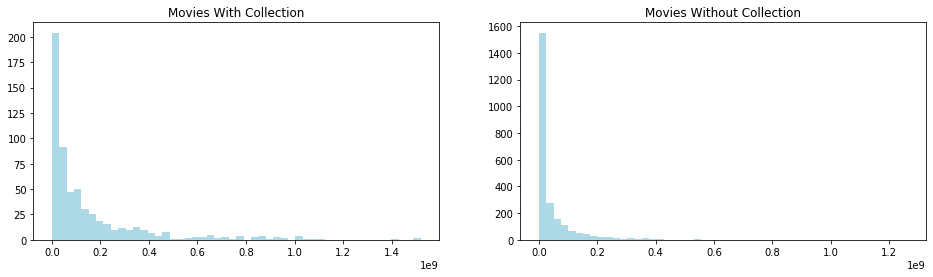

In [244]:
has_collection = train['belongs_to_collection'].apply(lambda x:1 if str(x) != 'nan' else 0)
df = pd.concat([has_collection,train[['revenue']]], axis = 1)

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,4))

ax1.hist(x = df.revenue[df['belongs_to_collection']==1], bins = 50, color = 'lightblue')
ax2.hist(x = df.revenue[df['belongs_to_collection']==0], bins = 50, color = 'lightblue')

ax1.set_title('Movies With Collection')
ax2.set_title('Movies Without Collection')
plt.show()


## 1.2 Buget

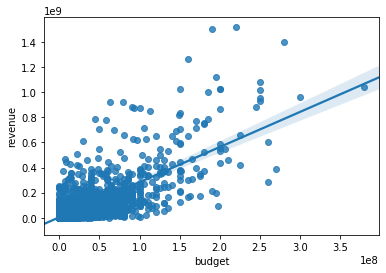

In [6]:
sns.regplot(x = "budget", y = "revenue", data = train)

In [7]:
train[['budget','revenue']].corr()

,budget,revenue
budget,1.000000,0.752965
revenue,0.752965,1.000000


As we can see the budget has a strong correlation with the revenue

## 1.3 Genres

In [307]:
df = prepare_dataframe(train,'genres','genre_')

Total of movies with each genre

In [308]:
df.sum().to_frame('total').reset_index().drop([0,1,2,3,4,5,6,7,8,9,10]).sort_values(by = 'total', ascending = False)

,index,total
12,genre_Drama,1531
11,genre_Comedy,1028
15,genre_Thriller,789
16,genre_Action,741
14,genre_Romance,571
22,genre_Crime,469
18,genre_Adventure,439
19,genre_Horror,301
23,genre_Science Fiction,290
13,genre_Family,260


In [299]:
range(10)

range(0, 10)

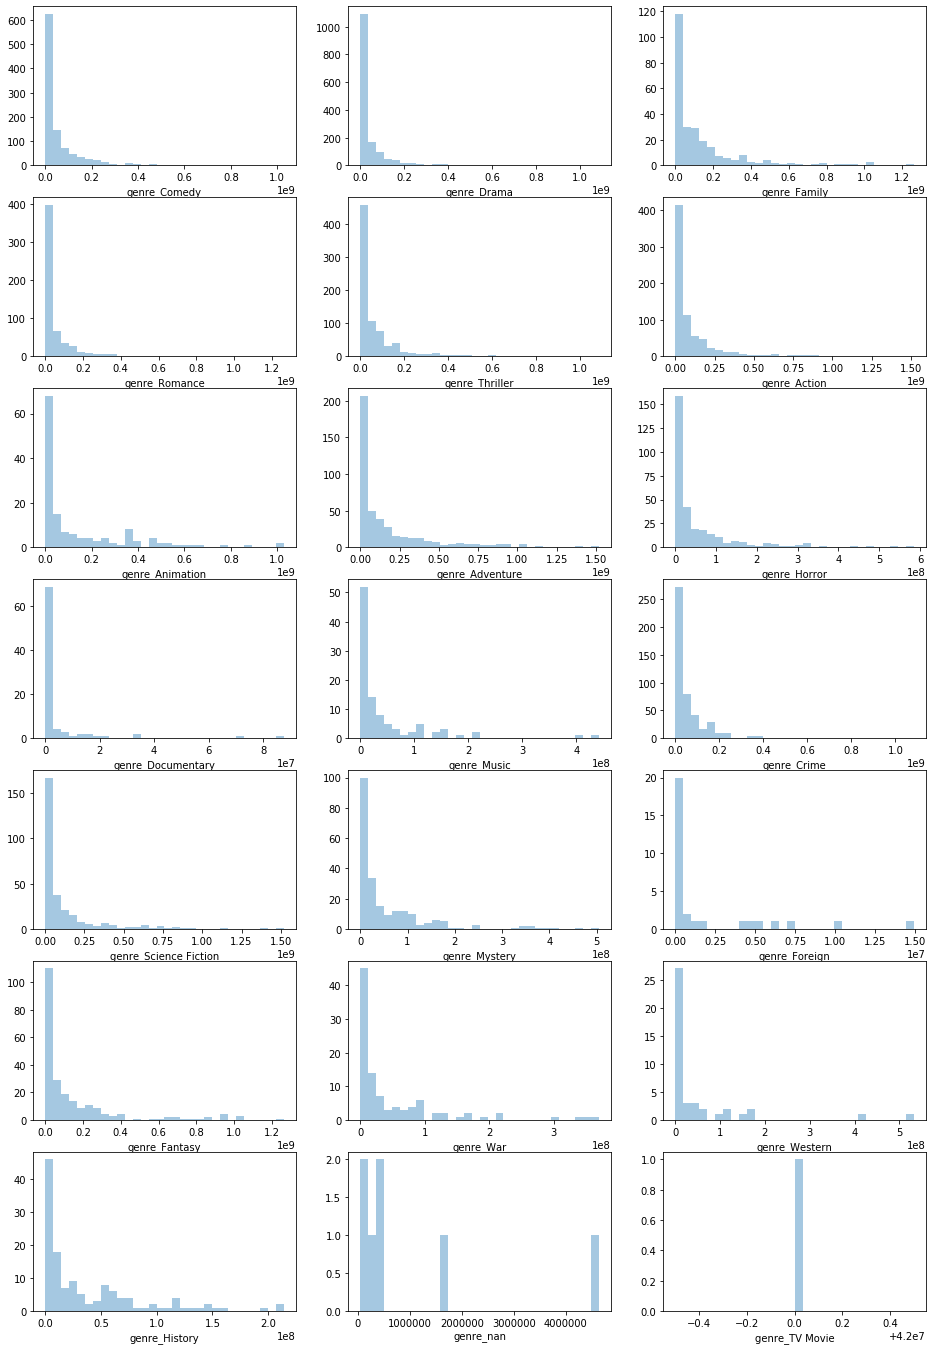

In [309]:
#Distribution of genres
f, axes = plt.subplots(7, 3, figsize = (16, 24))

for i, e in enumerate([col for col in df.columns if 'genre_' in col]):
    sns.distplot(a = df.revenue[df[e]==1], ax = axes[i // 3][i % 3], kde = False,bins = 30, axlabel = e) 

## 1.4 Homepage

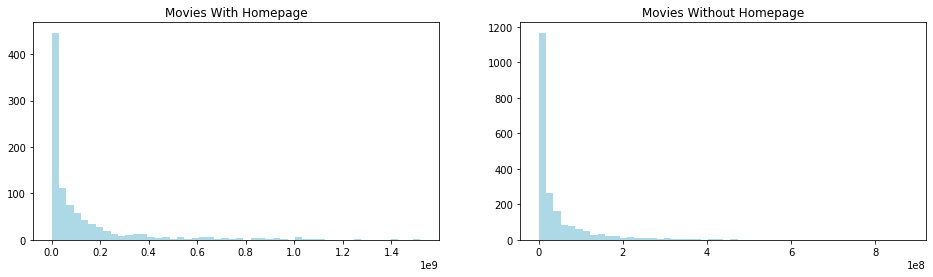

In [245]:
has_homepage = train['homepage'].apply(lambda x:1 if str(x) != 'nan' else 0)
df = pd.concat([has_homepage,train[['revenue']]], axis = 1)

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,4))

ax1.hist(x = df.revenue[df['homepage'] == 1], bins = 50,color = 'lightblue')
ax2.hist(x = df.revenue[df['homepage'] == 0], bins = 50,color = 'lightblue')

ax1.set_title('Movies With Homepage')
ax2.set_title('Movies Without Homepage')
plt.show()

## 1.5 Original Language

Total of movies with each original language:

In [166]:
total_languages = train.original_language.value_counts().to_frame('total')
total_languages.head()

,total
en,2575
fr,78
ru,47
es,43
hi,42


In [171]:
total_languages[0:10].sum()/total_languages.sum()

total    0.968333
dtype: float64

The top 10 original languages represent 96,8% of total original langauges. So we're going to consider only the top 10;


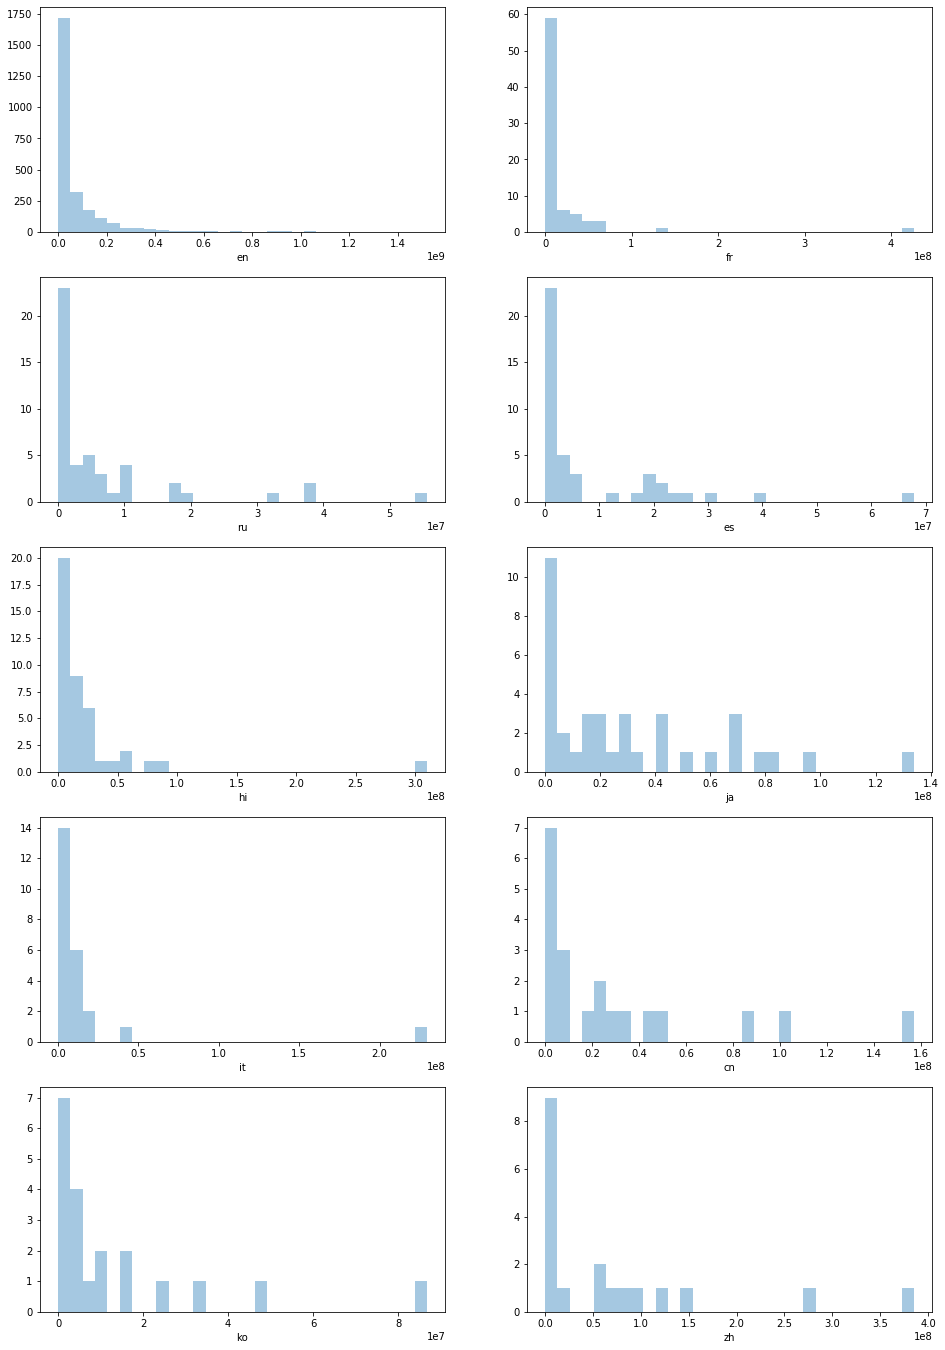

In [229]:
list_languages = list(total_languages.index[0:10])

f, axes = plt.subplots(5, 2, figsize = (16, 24))
for i,e in enumerate(list_languages):
    sns.distplot(a = train.revenue[train['original_language'] == e], ax = axes[i // 2][i % 2], kde = False,bins = 30, axlabel = e)


## 1.6 Popularity

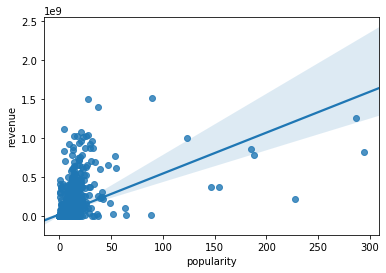

In [17]:
sns.regplot(x = "popularity", y = "revenue", data = train)

In [18]:
train[['popularity','revenue']].corr()

,popularity,revenue
popularity,1.00000,0.46146
revenue,0.46146,1.00000


As we can see the correlation between popularity and revenue isn't so strong

# 1.7 Production Companies

In [280]:
df = prepare_dataframe(train,'production_companies')

In [274]:
df.sum().sort_values(ascending = False).to_frame('total').drop('revenue').head()

,total
company_Warner Bros.,213
company_Universal Pictures,190
company_nan,181
company_42,179
company_Paramount,169


In [275]:
df.shape

(3000, 3697)

IndexError: index 5 is out of bounds for axis 0 with size 5

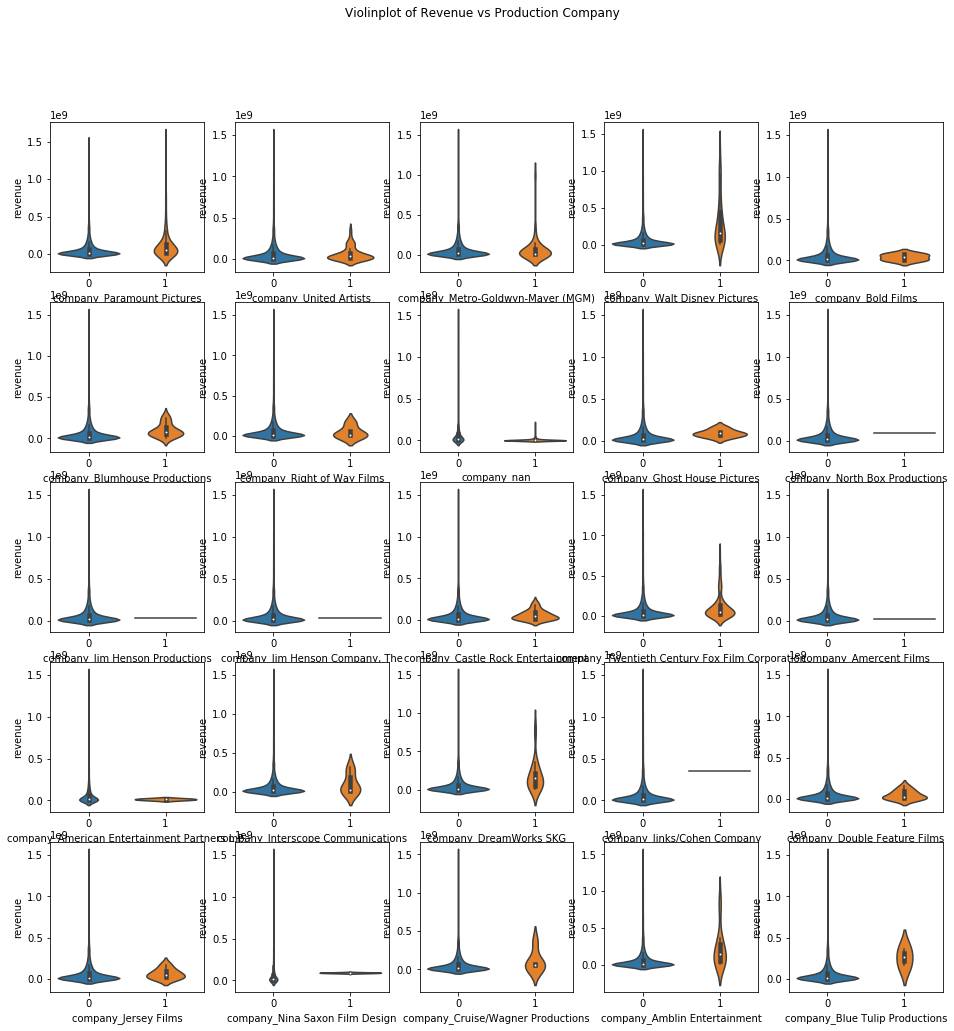

In [170]:
f, axes = plt.subplots(5, 5, figsize = (16, 16))
plt.suptitle('Violinplot of Revenue vs Production Company')
for i, e in enumerate([col for col in df.columns if 'company_' in col]):
    sns.violinplot(x = e, y = 'revenue', data = df, ax = axes[i // 5][i % 5]);

## 1.8 Production Contires

## 1.9 Release Date

In [207]:
df = train[['release_date','revenue']].copy()
df['release_date'] = pd.to_datetime(df.release_date)
df['day'] = df['release_date'].apply(lambda x: x.day)
df['month'] = df['release_date'].apply(lambda x: x.month)
df['year'] = df['release_date'].apply(lambda x: x.year)
df.drop(columns = ['release_date'], axis = 1, inplace = True)

In [213]:
df.year.value_counts()

2013    141
2015    128
2010    126
2012    125
2016    125
2011    124
2014    123
2006    114
2009    106
2007    105
2008    101
2005     99
2002     84
2004     83
2001     77
2003     74
1998     66
1999     65
2000     65
1997     63
1995     62
1988     56
1993     56
1996     55
1994     51
1989     47
1990     46
1987     45
1992     45
1986     44
       ... 
1974      5
2065      4
2056      4
2045      4
2061      4
2039      4
2051      4
2036      4
2058      3
2032      3
2042      3
2057      3
2028      3
2047      2
2040      2
2044      2
2050      2
2025      2
2027      2
2031      2
2033      2
2043      2
2049      2
2024      1
2026      1
2030      1
2038      1
2052      1
2021      1
2035      1
Name: year, Length: 90, dtype: int64

We have some values of year that are wrong. Let's correct them

In [216]:
df['year'] = df['year'].apply(lambda x: x%2000+1900 if x>2016 else x)

In [217]:
df.year.value_counts()

2013    141
2015    128
2010    126
2012    125
2016    125
2011    124
2014    123
2006    114
2009    106
2007    105
2008    101
2005     99
2002     84
2004     83
2001     77
2003     74
1998     66
2000     65
1999     65
1997     63
1995     62
1993     56
1988     56
1996     55
1994     51
1989     47
1990     46
1992     45
1987     45
1986     44
       ... 
1962      5
1936      4
1956      4
1965      4
1939      4
1945      4
1961      4
1951      4
1928      3
1932      3
1942      3
1957      3
1958      3
1927      2
1931      2
1940      2
1944      2
1949      2
1950      2
1947      2
1943      2
1925      2
1933      2
1952      1
1921      1
1938      1
1935      1
1930      1
1926      1
1924      1
Name: year, Length: 90, dtype: int64

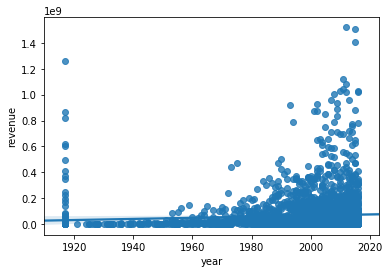

In [222]:
sns.regplot(x = 'year', y = 'revenue', data = df)

In [223]:
df[['revenue', 'year']].corr()

,revenue,year
revenue,1.000000,0.056458
year,0.056458,1.000000


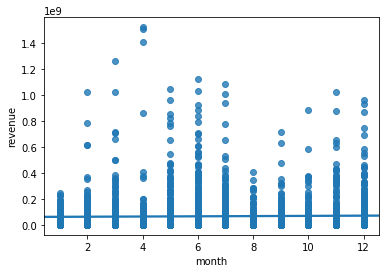

In [224]:
sns.regplot(x = 'month', y = 'revenue', data = df)

In [225]:
df[['revenue', 'month']].corr()

,revenue,month
revenue,1.000000,0.020164
month,0.020164,1.000000


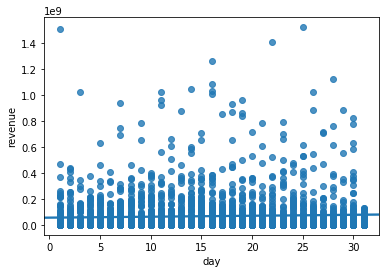

In [226]:
sns.regplot(x = 'day', y = 'revenue', data = df)

In [227]:
df[['revenue', 'day']].corr()

,revenue,day
revenue,1.000000,0.045699
day,0.045699,1.000000


As we can see the correlation between release date and revenue is weak

## 1.10 Runtime

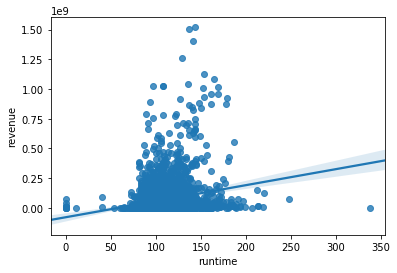

In [176]:
sns.regplot(x = 'runtime', y = 'revenue', data = train)

As we can see the correlation between runtime and revenue is weak

In [177]:
train[['revenue','runtime']].corr()

,revenue,runtime
revenue,1.00000,0.21638
runtime,0.21638,1.00000


## 1.11 Spoken Languages

## 1.12 Status 

## 1.13 Keywords

## 1.14 Cast

## 1.15 Crew

In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [138]:
train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


# 2.Data Preparation

Let's put all data together

In [345]:
#dropping the feature revenue from the train dataset
train_drop  = train.drop(columns =['revenue'])

#separting the output data from the train dataset
y = train.revenue

#getting the size of the train dataset
n_train = train.shape[0]

#putting the both datasets together
all_data = pd.concat((train_drop , test), sort = False).reset_index(drop = True)

#info from the new dataset
all_data.info()

#value used top check the most common values in a feature
top_value = 10

#dropping unusual features
#all_data = all_data.drop(columns = ['id','imdb_id','original_title','title'], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 22 columns):
id                       7398 non-null int64
belongs_to_collection    1481 non-null object
budget                   7398 non-null int64
genres                   7375 non-null object
homepage                 2366 non-null object
imdb_id                  7398 non-null object
original_language        7398 non-null object
original_title           7398 non-null object
overview                 7376 non-null object
popularity               7398 non-null float64
poster_path              7396 non-null object
production_companies     6984 non-null object
production_countries     7241 non-null object
release_date             7397 non-null object
runtime                  7392 non-null float64
spoken_languages         7336 non-null object
status                   7396 non-null object
tagline                  5938 non-null object
title                    7395 non-null object
Keywords           

Now let's check each feature

## 2.1 Belongs to Collection

Let's put 1 in the movies that have collection and 0 in ones that don't

In [317]:
all_data = has_in_dataframe(all_data,'has_collection','belongs_to_collection')

## 2.2 Genres

In [315]:
all_data = prepare_dataframe(all_data,'genres','genre_','name',10,True)

## 2.3 Homepage

In [319]:
all_data = has_in_dataframe(all_data,'has_homepage','homepage')

## 2.4 Original Language

In [11]:
#creating a column for each original language
all_data = pd.get_dummies(all_data, columns = ['original_language'], drop_first = True, prefix = 'original_language')

## 2.5 Overview

In [321]:
all_data = has_in_dataframe(all_data,'has_overview','overview')

## 2.6 Poster Path

In [323]:
all_data = has_in_dataframe(all_data,'has_poster_path','poster_path')

## 2.7 Production Companies

In [325]:
all_data = prepare_dataframe(all_data,'production_companies','company_','name',10,True)

## 2.8 Production Countries

In [327]:
all_data = prepare_dataframe(all_data,'production_countries','country_','name',10,True)

## 2.9 Release Date

In [ ]:
all_data['release_date'] = pd.to_datetime(all_data.release_date)

## 2.10.Runtime

In [ ]:
#replacing the nan values with the mean
all_data['runtime'].fillna(all_data.runtime.mean(), inplace = True)

## 2.11 Spoken Languages

In [329]:
all_data = prepare_dataframe(all_data,'spoken_languages','spoken_lang_','iso_639_1',10,True)

## 2.12 Status

In [17]:
all_data = pd.get_dummies(all_data, columns = ['status'], drop_first = True, prefix = 'status')

## 2.13 Tagline

In [331]:
all_data = has_in_dataframe(all_data,'has_tagline','tagline')

## 2.14 Keywords

In [332]:
all_data = prepare_dataframe(all_data,'Keywords','keyword_','name',10,True)

## 2.15 Cast

In [20]:
#getting the number of actors in each gender
all_data['cast_gender_0'] = all_data['cast'].apply(lambda x: [i['gender'] == 0 for i in eval(x)].count(True)  if str(x) != 'nan' else 0)
all_data['cast_gender_1'] = all_data['cast'].apply(lambda x: [i['gender'] == 1 for i in eval(x)].count(True)  if str(x) != 'nan' else 0)
all_data['cast_gender_2'] = all_data['cast'].apply(lambda x: [i['gender'] == 2 for i in eval(x)].count(True)  if str(x) != 'nan' else 0)

In [334]:
all_data = prepare_dataframe(all_data,'cast','cast_name_','name',10,True)

## 2.16 Crew

In [22]:
#getting the number of actors in each gender
all_data['crew_gender_0'] = all_data['crew'].apply(lambda x: [i['gender'] == 0 for i in eval(x)].count(True)  if str(x) != 'nan' else 0)
all_data['crew_gender_1'] = all_data['crew'].apply(lambda x: [i['gender'] == 1 for i in eval(x)].count(True)  if str(x) != 'nan' else 0)
all_data['crew_gender_2'] = all_data['crew'].apply(lambda x: [i['gender'] == 2 for i in eval(x)].count(True)  if str(x) != 'nan' else 0)

In [346]:
all_data = prepare_dataframe(all_data,'crew','crew_name_','name',10,False)
all_data = prepare_dataframe(all_data,'crew','dep_','department',10,False)
all_data = prepare_dataframe(all_data,'crew','job_','job',10,True)